In [32]:
# Third party
import importlib
import torch
import matplotlib.pyplot as plt

# User
import base.abstract
import base.mlp
import base.train
import base.encode
import base.pre_process

importlib.reload(base.abstract)
importlib.reload(base.mlp)
importlib.reload(base.train)
importlib.reload(base.encode)
importlib.reload(base.pre_process)

from base.mlp import MLP, LinearLayer
from base.train import sgd
from base.encode import get_encoder_decoder
from base.pre_process import get_dataset

In [23]:
encoder, decoder = get_encoder_decoder(training_data="../data/shakespear.txt", type='character')
# let's now encode the entire text dataset and store it into a torch.Tensor
with open("../data/shakespear.txt", 'r', encoding='utf-8') as f:
    text = f.read()
text_encoded = torch.tensor(encoder(text), dtype=torch.long)
unique_chars = sorted(list(set(text)))
set(text), text[0:10], text_encoded[0:10]

({'\n',
  ' ',
  '!',
  '$',
  '&',
  "'",
  ',',
  '-',
  '.',
  '3',
  ':',
  ';',
  '?',
  'A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y',
  'Z',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'},
 'First Citi',
 tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47]))

In [14]:
token_length = 3
dataset =  get_dataset(text_encoded, 3, context_window="fixed")
train_data, train_targets = dataset["train"]
validation_data, validation_targets = dataset["validation"]
len(train_data), len(validation_data)



(948085, 167309)

In [24]:
# We can create a general MLP with no embedding
hp = {
    "init_learning_rate": .1,
    "converging_learning_rate": .01,
    "learning_rate": .1,
    "epochs": 100000,
    "num_layer_1_nodes": 10,
    "mini_batch_size": 3,
    "token_length": token_length
}

l1 = LinearLayer(
    num_of_inputs=hp['token_length'],
    num_of_neurons=hp['num_layer_1_nodes'],
    activation_func=torch.tanh,
)
l2 = LinearLayer(
    num_of_inputs=hp['num_layer_1_nodes'],
    num_of_neurons=len(unique_chars),
)

mlp = MLP([l1,l2])

In [25]:
loss_list = []
mlp.require_grad()
sgd(hp, mlp, train_data.double(), train_targets, loss_list)

epoch: 0 / 100000, loss: 8.2317
epoch: 10000 / 100000, loss: 3.3782
epoch: 20000 / 100000, loss: 2.4853
epoch: 30000 / 100000, loss: 3.1908
epoch: 40000 / 100000, loss: 2.4443
epoch: 50000 / 100000, loss: 2.7964
epoch: 60000 / 100000, loss: 5.3189
epoch: 70000 / 100000, loss: 3.3932
epoch: 80000 / 100000, loss: 3.5809
epoch: 90000 / 100000, loss: 3.0085


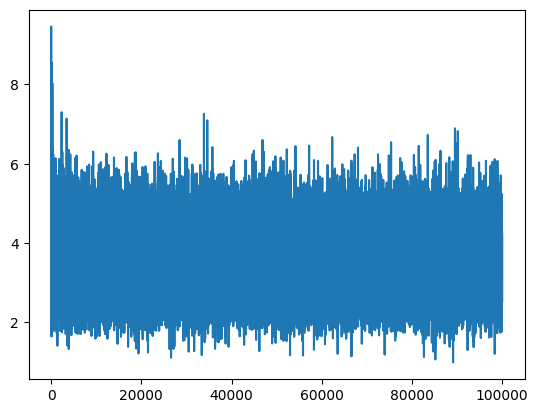

In [26]:
plt.plot(loss_list)


In [29]:
# Compute negative log likelihood of the train/validation

print(f"train loss: {mlp.dataset_loss(train_data.double(), train_targets)}")
print(f"validation loss: {mlp.dataset_loss(validation_data.double(), validation_targets)}")

train loss: 3.3667315811461935
validation loss: 3.3861852437693476
